# <font color='red'> [0] Build the model and the structure of the metabolic network </font> 

## <font color='green'> [0.1] Importation of the package </font> 

In [1]:
import sys
sys.path.append('../')

from main import *

## <font color='green'> [0.2] Creation of an empty model </font> 

Let's create a model as a variable

In [2]:
model = MODEL()

## <font color='green'> [0.3] Load of an existing model </font> 

Instead of creating a model from nothing, you can load an existing model.

You can create a linear network of $n$ metabolites

In [3]:
model.creat_linear(n=4)

By default, the first and last metabolites are external

In [4]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,1.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW


In [5]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'meta_0': -1, 'meta_1': 1}",1.0,True,1.0,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


The stoichiometric matrix is already build

In [6]:
model.N

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


You can also load models from SBML, COBRA and SBTAB with model.load...

## <font color='green'> [0.3] Change a reaction and metabolite </font> 

Modifying the dictionary of the metabolite in the dataframe of reaction change also the dataframes of metabolites and stoichiometry

In [7]:
model.reactions.change(name="reaction_0", metabolites={'new_meta':-2, 'meta_1':1}, k_eq=1.5, reversible=False, flux=1.5)

In [8]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


In [9]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,1.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW


In [10]:
model.N

,reaction_0,reaction_1,reaction_2
meta_0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0
meta_2,0.0,1.0,-1.0
meta_3,0.0,0.0,1.0
new_meta,-2.0,0.0,0.0


The same for the metabolite

In [11]:
model.metabolites.change("meta_0", concentration=2.0)

In [12]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW


## <font color='green'> [0.4] Add reaction and metabolite </font> 

To add a reaction, only its name as input is indispensable, but adding a dictionary of the metabolite used in the reaction as a key linked to their stoichiometric coefficients allows the module to add automatically those metabolites to the metabolite dataframe and their coefficient to the stoichiometric matrix

In [13]:
model.metabolites.add(name = "H2O", external = True, concentration = 1.0)

metabolite_reaction = {"H2O" : 1.0,
                       "H2"  :-1.0,
                       "O2"  :-0.5}

model.reactions.add(name = "combustion", metabolites = metabolite_reaction, k_eq = 1.0, flux=1.0)

In [14]:
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW
H2O,True,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
O2,False,1.0,mmol/gDW


If you add a reaction that is already in the model, it is called the model. reactions.change() instead 

In [15]:
metabolite_reaction2 = {"C" : -1.0,
                       "O2"  : -1.0,
                       "CO2"  : 1.0}

model.reactions.add(name = "combustion", metabolites = metabolite_reaction2, k_eq = 1.0, flux=1.0)

In [16]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h
combustion,"{'C': -1.0, 'O2': -1.0, 'CO2': 1.0}",1.0,True,1.0,mmol/gDW/h


Add a reaction with specified metabolite and stoichiometric coefficient automatically adds them to the model

In [17]:
model.N
# Same
model.Stoichio_matrix_pd

,reaction_0,reaction_1,reaction_2,combustion
meta_0,0.0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0,0.0
meta_2,0.0,1.0,-1.0,0.0
meta_3,0.0,0.0,1.0,0.0
new_meta,-2.0,0.0,0.0,0.0
H2O,0.0,0.0,0.0,0.0
H2,0.0,0.0,0.0,0.0
O2,0.0,0.0,0.0,-1.0
C,0.0,0.0,0.0,-1.0
CO2,0.0,0.0,0.0,1.0


## <font color='green'> [0.5] Removing a reaction and metabolite </font> 

It is also possible to remove a metabolite or a reaction from the model

In [18]:
model.metabolites.remove("O2")
model.metabolites.df

,External,Concentration,Unit
meta_0,True,2.0,mmol/gDW
meta_1,False,1.0,mmol/gDW
meta_2,False,1.0,mmol/gDW
meta_3,True,1.0,mmol/gDW
new_meta,False,1.0,mmol/gDW
H2O,True,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
C,False,1.0,mmol/gDW
CO2,False,1.0,mmol/gDW


Removing a metabolite or a reaction remove also every mention of it in the stoichiometric matrix and elasticities matrix

Same for the mention of the metabolite on the reaction dataframe

In [19]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h
combustion,"{'C': -1.0, 'CO2': 1.0}",1.0,True,1.0,mmol/gDW/h


In [20]:
model.N

,reaction_0,reaction_1,reaction_2,combustion
meta_0,0.0,0.0,0.0,0.0
meta_1,1.0,-1.0,0.0,0.0
meta_2,0.0,1.0,-1.0,0.0
meta_3,0.0,0.0,1.0,0.0
new_meta,-2.0,0.0,0.0,0.0
H2O,0.0,0.0,0.0,0.0
H2,0.0,0.0,0.0,0.0
C,0.0,0.0,0.0,-1.0
CO2,0.0,0.0,0.0,1.0


In [21]:
model.reactions.remove("combustion")

In [22]:
model.reactions.remove(name="combustion")
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
reaction_0,"{'new_meta': -2, 'meta_1': 1}",1.5,False,1.5,mmol/gDW/h
reaction_1,"{'meta_1': -1, 'meta_2': 1}",1.0,True,1.0,mmol/gDW/h
reaction_2,"{'meta_2': -1, 'meta_3': 1}",1.0,True,1.0,mmol/gDW/h


## <font color='green'> [0.6] Stoichiometric matrix from an existant one </font> 

##### You can also change the stoichiometric matrix

You have 2 options :
- Attribute to the stoichiometric matrix a Pandas Dataframe, whatever the size, and the program will create a new model based on the metabolites (rows) and reactions (columns) of the dataframe
- Attribute a Numpy array, and the program will change the value of the coefficients of the matrix

In [23]:
reactions = {'Combustion': [1. , -1., -0.5],
             'Reaction_2': [0. ,  0.,   1. ]}

metabolites = ['H2O', 'H2', 'O2']

dataframe = pd.DataFrame(reactions, index=metabolites)

model.Stoichio_matrix_pd = dataframe

And the metabolites and reactions dataframes are automatically updated !

In [24]:
model.N

,Combustion,Reaction_2
H2O,1.0,0.0
H2,-1.0,0.0
O2,-0.5,1.0


In [25]:
model.reactions.df

,Metabolites,Equilibrium constant,Reversible,Flux,Unit
Combustion,"{'H2O': 1.0, 'H2': -1.0, 'O2': -0.5}",1.0,True,1.0,mmol/gDW/h
Reaction_2,{'O2': 1.0},1.0,True,1.0,mmol/gDW/h


In [26]:
model.metabolites.df

,External,Concentration,Unit
H2O,False,1.0,mmol/gDW
H2,False,1.0,mmol/gDW
O2,False,1.0,mmol/gDW


# <font color='red'> [1] Play with the dynamic of model </font> 

In [27]:
model.creat_linear(4)

## <font color='green'> [1.1] Parameters </font> 

By default, the temperature is in the parameters dataframe

In [28]:
model.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0


You can add any parameter with its mean values and standard deviation to represent its uncertainty

In [29]:
model.parameters.add("pH", mean=7., Standard_deviation=2.)
model.parameters.df

,Mean values,Standard deviation
Temperature,273.15,1.0
pH,7.0,2.0


You can also remove a parameter

In [30]:
model.parameters.remove("Temperature")
model.parameters.df

Name of the removed parameter : Temperature


,Mean values,Standard deviation
pH,7.0,2.0


You can also consider the external metabolite as parameter of the model

In [31]:
model.parameters.add_externals()

## <font color='green'> [1.2] Enzymes </font> 

You can add enzyme to the model and liked them to reactions

In [32]:
model.enzymes.add("enzyme_test", mean=1, reaction_linked=["reaction_0", "reaction_2"])
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_test,1,"[reaction_0, reaction_2]"


You can also use the model.enzymes.add_to_all_reaction() method to create an enzyme linked to each reaction, with the name "enzyme_{reaction_name}"

In [33]:
model.enzymes.add_to_all_reaction()
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_test,1,"[reaction_0, reaction_2]"
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


In [34]:
model.enzymes.remove("enzyme_test")
model.enzymes.df

,Concentration / Activity,Reactions linked
enzyme_reaction_0,1,[reaction_0]
enzyme_reaction_1,1,[reaction_1]
enzyme_reaction_2,1,[reaction_2]


Finally, you can add the enzyme as parameters, they will be added with their name of enzyme + "_para"

In [35]:
model.parameters.add_enzymes()
model.parameters.df

,Mean values,Standard deviation
pH,7.0,2.0
meta_0_para,1.0,1.0
meta_3_para,1.0,1.0
enzyme_reaction_0_para,1.0,1.0
enzyme_reaction_1_para,1.0,1.0
enzyme_reaction_2_para,1.0,1.0


## <font color='green'> [1.3] Operons </font> 

You can create a dependency between enzymes by specifying if they are linked by an operon

In [36]:
model.operons.add("operon_lactose", enzymes_linked=["enzyme_reaction_0", "enzyme_reaction_2"], mixed_covariance=0.42)
model.operons.df

,Enzymes linked,Mixed covariance,Activated
operon_lactose,"[enzyme_reaction_0_para, enzyme_reaction_2_para]",0.42,True


By default, an operon is activated, you can inactivate it at any moment

In [37]:
model.operons.inactivate("operon_lactose")

## <font color='green'> [1.4] Elasticity matrix of parameters </font> 

In [38]:
model.elasticity.p.df

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.5,-0.0,1.0,0.0,0.0
reaction_1,-0.0,-0.0,0.0,1.0,0.0
reaction_2,-0.0,-0.5,0.0,0.0,1.0


You can change the elasticity matrix by changing 1 by 1 each element using the methods of the Pandas module     
or by using model.elasticity.p.change() (slowest but there is a security to check the input)

In [39]:
model.elasticity.p.change(flux_name="reaction_0", parameter_name="enzyme_reaction_0_para", value=-2.)
model.elasticity.p.df.at["reaction_1", "enzyme_reaction_1_para"] = 3
model.elasticity.p.df

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.5,-0.0,-2.0,0.0,0.0
reaction_1,-0.0,-0.0,0.0,3.0,0.0
reaction_2,-0.0,-0.5,0.0,0.0,1.0


## <font color='green'> [1.5] Elasticities matrix of internal metabolites </font> 

Only the internal metabolites are in the $\varepsilon_s$ elasticiy matrix

In [40]:
model.elasticity.s.df

,meta_1,meta_2
reaction_0,0,0
reaction_1,0,0
reaction_2,0,0


You can change the elasticity matrix by changing 1 by 1 each element using the methods of the Pandas module     
or by using model.elasticity.s.change() (slowest but there is a security to check the input)

In [41]:
model.elasticity.s.df.at["reaction_0", "meta_1"] = 1
model.elasticity.s.change("reaction_2", "meta_2", -1)
model.elasticity.s.df

,meta_1,meta_2
reaction_0,1,0
reaction_1,0,0
reaction_2,0,-1


Or by adding an entire Numpy matrix of the same size

In [42]:
matrix_data = np.array([[1,-4],
                        [-2,5],
                        [3,-6]])

model.elasticity.s.df[:] = matrix_data
model.elasticity.s.df

,meta_1,meta_2
reaction_0,1,-4
reaction_1,-2,5
reaction_2,3,-6


You can assume that the enzymes are half-saturated, the elasticity is therefore equal to $-0.5N^T$

In [43]:
model.elasticity.s.half_satured()
model.elasticity.s.df

,meta_1,meta_2
reaction_0,-0.5,-0.0
reaction_1,0.5,-0.5
reaction_2,-0.0,0.5


# <font color='red'> [2] Post-simulation analysis </font> 

In [44]:
model.creat_linear(4)
model.parameters.add_externals()
model.enzymes.add_to_all_reaction()
model.parameters.add_enzymes()
model.parameters.remove("Temperature")
model.elasticity.s.half_satured()

 
Name of the removed parameter : Temperature


## <font color='green'> [2.0] Structure's variable </font> 

The stoichiometric matrix $N$ (or $S$ for the culturless peoples)

In [45]:
model.Stoichio_matrix_pd

,reaction_0,reaction_1,reaction_2
meta_0,-1,0,0
meta_1,1,-1,0
meta_2,0,1,-1
meta_3,0,0,1


You also can get a reduced version of the stoichiometric matrix and the link matrix associated

In [46]:
L, N_r = model.Link_matrix
print("Link matrix :\n",L)
N_r

Link matrix :
 [[ 1.00000000e+00 -3.33066907e-16]
 [ 2.77555756e-16  1.00000000e+00]]


,reaction_0,reaction_1,reaction_2
meta_1,1,-1,0
meta_2,0,1,-1


## <font color='green'> [2.1] Jacobian matrix </font> 

The Jacobian matrix is recomputed each time there is a modification in $N$ or $E_s$, else it is stored in a cache

In [47]:
model.Jacobian

,meta_1,meta_2
meta_1,-1.0,0.5
meta_2,0.5,-1.0


In [48]:
model.Jacobian_reversed

,meta_1,meta_2
meta_1,-1.333333,-0.666667
meta_2,-0.666667,-1.333333


## <font color='green'> [2.2] MCA response coefficient </font> 

Sub element of the response matrix : $R^s_p$ and $R^v_p$

In [49]:
model.R_v_p

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
reaction_0,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_1,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_2,0.166667,-0.166667,0.333333,0.333333,0.333333


In [50]:
model.R_s_p

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_1,0.666667,0.333333,1.333333,-0.666667,-0.666667
meta_2,0.333333,0.666667,0.666667,0.666667,-1.333333


The entire response matrix is constituted of $R^s_p$ and $R^v_p$ as a block matrix

In [51]:
model.R

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para
meta_1,0.666667,0.333333,1.333333,-0.666667,-0.666667
meta_2,0.333333,0.666667,0.666667,0.666667,-1.333333
reaction_0,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_1,0.166667,-0.166667,0.333333,0.333333,0.333333
reaction_2,0.166667,-0.166667,0.333333,0.333333,0.333333


## <font color='green'> [2.3] Covariance, Correlation and Mutual Information </font> 


### <font color='white'> [2.3.1] Covariance</font> 

The program can compute the covariance matrix of the model by a matrix product of the response matrix and the covariance matrix of the parameters (a multivariate normal distribution independent by default) to study the transmission of information through the system

In [52]:
model.covariance

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333,0.166667,0.166667,0.166667
meta_3_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.333333,0.666667,-0.166667,-0.166667,-0.166667
enzyme_reaction_0_para,0.000000,0.000000,1.000000,0.000000,0.000000,1.333333,0.666667,0.333333,0.333333,0.333333
enzyme_reaction_1_para,0.000000,0.000000,0.000000,1.000000,0.000000,-0.666667,0.666667,0.333333,0.333333,0.333333
enzyme_reaction_2_para,0.000000,0.000000,0.000000,0.000000,1.000000,-0.666667,-1.333333,0.333333,0.333333,0.333333
meta_1,0.666667,0.333333,1.333333,-0.666667,-0.666667,3.222222,1.777778,0.055556,0.055556,0.055556
meta_2,0.333333,0.666667,0.666667,0.666667,-1.333333,1.777778,3.222222,-0.055556,-0.055556,-0.055556
reaction_0,0.166667,-0.166667,0.333333,0.333333,0.333333,0.055556,-0.055556,0.388889,0.388889,0.388889
reaction_1,0.166667,-0.166667,0.333333,0.333333,0.333333,0.055556,-0.055556,0.388889,0.388889,0.388889
reaction_2,0.166667,-0.166667,0.333333,0.333333,0.333333,0.055556,-0.055556,0.388889,0.388889,0.388889


### <font color='white'> [2.3.2] Corelation </font> 

You can therefore compute the correlation

In [53]:
model.correlation

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,1.000000,0.000000,0.000000,0.000000,0.000000,0.371391,0.185695,0.267261,0.267261,0.267261
meta_3_para,0.000000,1.000000,0.000000,0.000000,0.000000,0.185695,0.371391,-0.267261,-0.267261,-0.267261
enzyme_reaction_0_para,0.000000,0.000000,1.000000,0.000000,0.000000,0.742781,0.371391,0.534522,0.534522,0.534522
enzyme_reaction_1_para,0.000000,0.000000,0.000000,1.000000,0.000000,-0.371391,0.371391,0.534522,0.534522,0.534522
enzyme_reaction_2_para,0.000000,0.000000,0.000000,0.000000,1.000000,-0.371391,-0.742781,0.534522,0.534522,0.534522
meta_1,0.371391,0.185695,0.742781,-0.371391,-0.371391,1.000000,0.551724,0.049629,0.049629,0.049629
meta_2,0.185695,0.371391,0.371391,0.371391,-0.742781,0.551724,1.000000,-0.049629,-0.049629,-0.049629
reaction_0,0.267261,-0.267261,0.534522,0.534522,0.534522,0.049629,-0.049629,1.000000,1.000000,1.000000
reaction_1,0.267261,-0.267261,0.534522,0.534522,0.534522,0.049629,-0.049629,1.000000,1.000000,1.000000
reaction_2,0.267261,-0.267261,0.534522,0.534522,0.534522,0.049629,-0.049629,1.000000,1.000000,1.000000


### <font color='white'> [2.3.3] Entropy </font> 

In [54]:
model.entropy

,Entropy
meta_0_para,1.918939
meta_3_para,1.918939
enzyme_reaction_0_para,1.918939
enzyme_reaction_1_para,1.918939
enzyme_reaction_2_para,1.918939
meta_1,2.503974
meta_2,2.503974
reaction_0,1.446708
reaction_1,1.446708
reaction_2,1.446708


You can also study the entropy between groups of elements of the model

Taking as input :
- [] -> Every element is studied individually
- dict -> name of the groups as keys and list of str of the elements as values
- list of list -> list of groups with default names

In [55]:
model.group_entropy([["meta_0_para", "meta_1"],["enzyme_reaction_0_para", "reaction_2"]])

,Entropy
group_0,3.348703
group_1,2.197410


### <font color='white'> [2.3.4] Conditional entropy </font> 

In [56]:
model.entropy_conditional

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,-inf,1.918939,1.918939,1.918939,1.918939,1.844729,1.901393,1.881885,1.881885,1.881885
meta_3_para,1.918939,-inf,1.918939,1.918939,1.918939,1.901393,1.844729,1.881885,1.881885,1.881885
enzyme_reaction_0_para,1.918939,1.918939,-inf,1.918939,1.918939,1.517765,1.844729,1.750702,1.750702,1.750702
enzyme_reaction_1_para,1.918939,1.918939,1.918939,-inf,1.918939,1.844729,1.844729,1.750702,1.750702,1.750702
enzyme_reaction_2_para,1.918939,1.918939,1.918939,1.918939,-inf,1.844729,1.517765,1.750702,1.750702,1.750702
meta_1,2.429764,2.486428,2.102801,2.429764,2.429764,-inf,2.322484,2.502741,2.502741,2.502741
meta_2,2.486428,2.429764,2.429764,2.429764,2.102801,2.322484,-inf,2.502741,2.502741,2.502741
reaction_0,1.409654,1.409654,1.278472,1.278472,1.278472,1.445475,1.445475,-inf,-inf,-inf
reaction_1,1.409654,1.409654,1.278472,1.278472,1.278472,1.445475,1.445475,-inf,-inf,-inf
reaction_2,1.409654,1.409654,1.278472,1.278472,1.278472,1.445475,1.445475,-inf,-inf,-inf


### <font color='white'> [2.3.5] Joint entropy </font> 

In [57]:
model.joint_entropy

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,inf,2.837877,2.837877,2.837877,2.837877,3.348703,3.405367,2.328592,2.328592,2.328592
meta_3_para,2.837877,inf,2.837877,2.837877,2.837877,3.405367,3.348703,2.328592,2.328592,2.328592
enzyme_reaction_0_para,2.837877,2.837877,inf,2.837877,2.837877,3.021739,3.348703,2.197410,2.197410,2.197410
enzyme_reaction_1_para,2.837877,2.837877,2.837877,inf,2.837877,3.348703,3.348703,2.197410,2.197410,2.197410
enzyme_reaction_2_para,2.837877,2.837877,2.837877,2.837877,inf,3.348703,3.021739,2.197410,2.197410,2.197410
meta_1,3.348703,3.405367,3.021739,3.348703,3.348703,inf,3.826458,2.949449,2.949449,2.949449
meta_2,3.405367,3.348703,3.348703,3.348703,3.021739,3.826458,inf,2.949449,2.949449,2.949449
reaction_0,2.328592,2.328592,2.197410,2.197410,2.197410,2.949449,2.949449,inf,inf,inf
reaction_1,2.328592,2.328592,2.197410,2.197410,2.197410,2.949449,2.949449,inf,inf,inf
reaction_2,2.328592,2.328592,2.197410,2.197410,2.197410,2.949449,2.949449,inf,inf,inf


### <font color='white'> [2.3.6] Mutual Information </font> 

In [58]:
model.MI

,meta_0_para,meta_3_para,enzyme_reaction_0_para,enzyme_reaction_1_para,enzyme_reaction_2_para,meta_1,meta_2,reaction_0,reaction_1,reaction_2
meta_0_para,inf,-0.000000,-0.000000,-0.000000,-0.000000,0.074210,0.017546,0.037054,0.037054,0.037054
meta_3_para,-0.000000,inf,-0.000000,-0.000000,-0.000000,0.017546,0.074210,0.037054,0.037054,0.037054
enzyme_reaction_0_para,-0.000000,-0.000000,inf,-0.000000,-0.000000,0.401173,0.074210,0.168236,0.168236,0.168236
enzyme_reaction_1_para,-0.000000,-0.000000,-0.000000,inf,-0.000000,0.074210,0.074210,0.168236,0.168236,0.168236
enzyme_reaction_2_para,-0.000000,-0.000000,-0.000000,-0.000000,inf,0.074210,0.401173,0.168236,0.168236,0.168236
meta_1,0.074210,0.017546,0.401173,0.074210,0.074210,inf,0.181490,0.001233,0.001233,0.001233
meta_2,0.017546,0.074210,0.074210,0.074210,0.401173,0.181490,inf,0.001233,0.001233,0.001233
reaction_0,0.037054,0.037054,0.168236,0.168236,0.168236,0.001233,0.001233,inf,inf,inf
reaction_1,0.037054,0.037054,0.168236,0.168236,0.168236,0.001233,0.001233,inf,inf,inf
reaction_2,0.037054,0.037054,0.168236,0.168236,0.168236,0.001233,0.001233,inf,inf,inf


You can also plot a histogram of the mutual information and conditional entropy (the sum represents its entropy) of a certain element with every other elements of the model

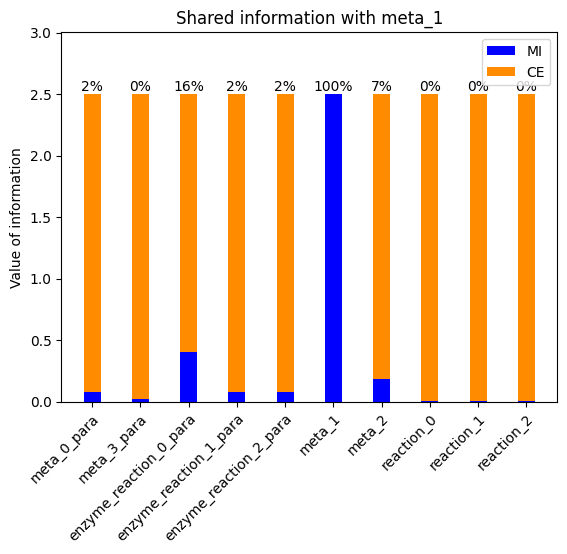

In [72]:
model.plot_entropy("meta_1")

or you can do the inverse and plot a histogram of every elements of the model compare to an certain element

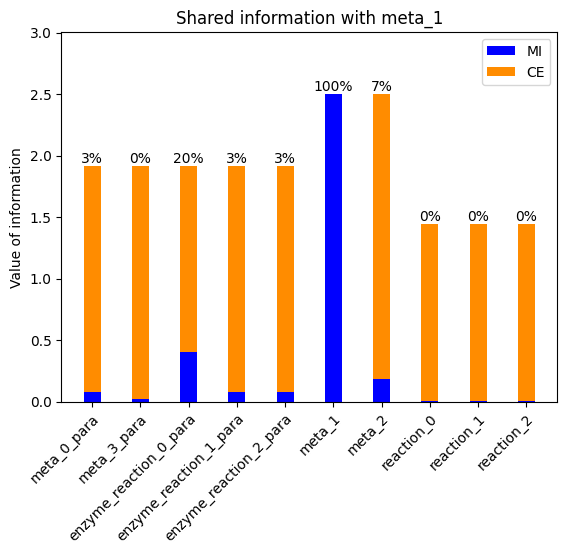

In [76]:
model.plot_entropy("meta_1", reversed=True)

## <font color='green'> [2.4] Sampling </font> 


You can sample some data from the model and look for the mean value of the correlation or mutual information matrix

### <font color='white'> [2.4.1] Updating the dataframe of the sampling data </font> 

In [59]:
model.data_sampling

,Name,Type,Mean,Standard deviation,Distribution


You have to add to the sampling dataframe the element of the model that you want to sample

In [60]:
model.add_sampling_data(["reaction_0","enzyme_reaction_1_para"], "elasticity_p", mean = True)

model.data_sampling

,Name,Type,Mean,Standard deviation,Distribution
0,"[reaction_0, enzyme_reaction_1_para]",elasticity_p,0.0,1,uniform


### <font color='white'> [2.4.2] Launch of the sampling loop </font> 

In [61]:
model.sampling(N=10, result="rho", seed_constant=False)

running time of the code : 0.07645869255065918 
So 0.007645869255065918 per occurences !


array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.37139068,  0.18569534,  0.26726124,  0.26726124,  0.26726124],
       [ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.18569534,  0.37139068, -0.26726124, -0.26726124, -0.26726124],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.74278135,  0.37139068,  0.53452248,  0.53452248,  0.53452248],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        -0.37139068,  0.37139068,  0.53452248,  0.53452248,  0.53452248],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -0.37139068, -0.74278135,  0.53452248,  0.53452248,  0.53452248],
       [ 0.37139068,  0.18569534,  0.74278135, -0.37139068, -0.37139068,
         1.        ,  0.55172414,  0.04962917,  0.04962917,  0.04962917],
       [ 0.18569534,  0.37139068,  0.37139068,  0.37139068, -0.74278135,
         0.55172414,  1.        , -0.04962917

# <font color='red'> [3] Graph of the result </font> 

## <font color='green'> [3.1] Heat map </font> 


You can display some previous results on a heat map

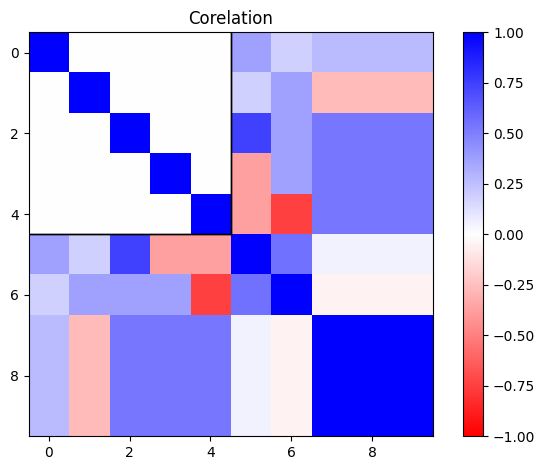

(<Figure size 640x480 with 2 Axes>,
 <AxesSubplot: title={'center': 'Corelation'}>,
 <matplotlib.image.AxesImage at 0x740806d6b4f0>)

In [62]:
model.plot(result="rho", title="Corelation")

## <font color='green'> [3.2] Boxplot </font> 


You can open a window to display a graphic interface to study the influence of the fixation of a variable

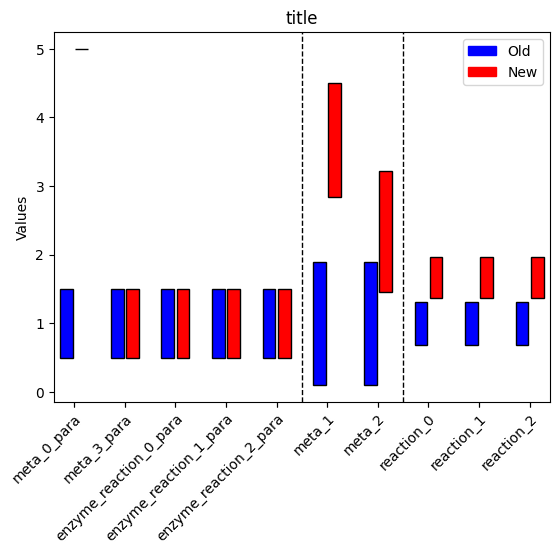

In [63]:
model.graphic_interface()

If you want to study the influence of multiple fixations of elements, use .boxplot() or .group_entropy_fixed_vector instead

## <font color='green'> [3.3] Eschermap </font> 


If you have a model file and a map file (both in .json), you can display things on an Esher map

In [64]:
model_path = "../Exemples/linear/model_linear.json"
map_path = "../Exemples/linear/map_linear.json"

### <font color='white'> [3.3.1] Display the reference state </font> 

In [65]:
model.escher_reference(model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'meta_0': 1.0, 'meta_1': 1.0, 'meta_2': 1.0, 'meta_3': 1.0}, metabolite_n…

### <font color='white'> [3.3.2] Display MI or correlation </font> 

You can display the mutual information or the correlation between every metabolite and an element of the model

In [70]:
model.escher_information(studied="enzyme_reaction_1_para", result="rho", model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'meta_0': 0.0, 'meta_1': -0.37139067635410394, 'meta_2': 0.37139067635410…

### <font color='white'> [3.3.3] Display mean deviation </font> 

You can also display on Escher map of the mean deviation that occurs when you fixe an element of the model to a certain value

In [71]:
model.escher_mean_deviation(fixed_element="enzyme_reaction_1_para", fixed_value=1.5, model_json=model_path, map_json=map_path)

Builder(height=600, metabolite_data={'meta_0': 0.0, 'meta_1': -0.33333333333333354, 'meta_2': 0.33333333333333…

In [ ]:
model.test_real_data()

In [ ]:
model.similarity()

9.797163200557238

In [73]:
a = model.group_entropy_fixed_vector(elements_to_fixe="meta_2", elements_to_study=[])


[8.326672684688674e-17 -1.1102230246251565e-16 -1.1102230246251565e-16
 -1.1102230246251565e-16 -5.551115123125783e-17 3.0531133177191805e-16
 -inf 4.0549161250957866e-17 -1.8149544367407344e-16 9.627715291671279e-17]


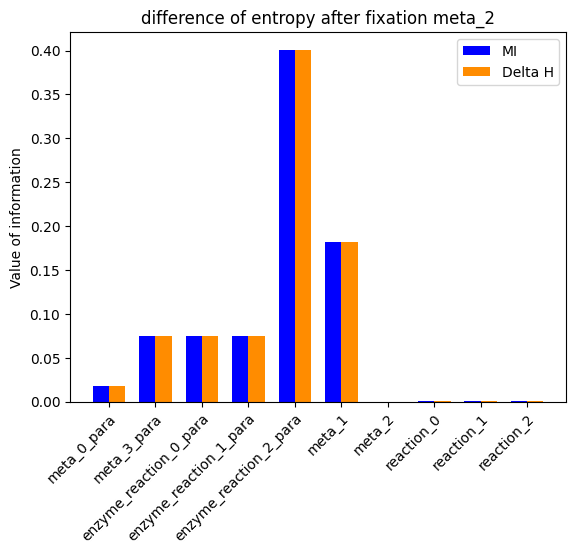

In [ ]:
model.plot_entropy_fixed("meta_2")